# Instructions


The assignment is at the bottom!

## This cell automatically downloads Capital Bikeshare data

### And here we read in the data

In [182]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 20, 10
import pandas as pd
import numpy as np
bikes = pd.read_csv(r'C:\Users\17036\Desktop\mlnn\data\bikeshare.csv.gz')
bikes.head()
bikes['start'] = pd.to_datetime(bikes['Start date'], infer_datetime_format=True)
bikes['end'] = pd.to_datetime(bikes['End date'], infer_datetime_format=True)
bikes["dur"] = (bikes['Duration (ms)']/1000).astype(int)
bikes.head()

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type,start,end,dur
0,301295,3/31/2016 23:59,4/1/2016 0:04,31280,11th & S St NW,31506,1st & Rhode Island Ave NW,W00022,Registered,2016-03-31 23:59:00,2016-04-01 00:04:00,301
1,557887,3/31/2016 23:59,4/1/2016 0:08,31275,New Hampshire Ave & 24th St NW,31114,18th St & Wyoming Ave NW,W01294,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00,557
2,555944,3/31/2016 23:59,4/1/2016 0:08,31101,14th & V St NW,31221,18th & M St NW,W01416,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00,555
3,766916,3/31/2016 23:57,4/1/2016 0:09,31226,34th St & Wisconsin Ave NW,31214,17th & Corcoran St NW,W01090,Registered,2016-03-31 23:57:00,2016-04-01 00:09:00,766
4,139656,3/31/2016 23:57,3/31/2016 23:59,31011,23rd & Crystal Dr,31009,27th & Crystal Dr,W21934,Registered,2016-03-31 23:57:00,2016-03-31 23:59:00,139


In [183]:
bikes.dur.mean()

992.8716543657755

In [184]:
bikes.dur.std()

2073.9809135296514

In [185]:
bikes[bikes.dur>16000].shape

(973, 12)

In [186]:
plt.rcParams['figure.figsize'] = 20, 10

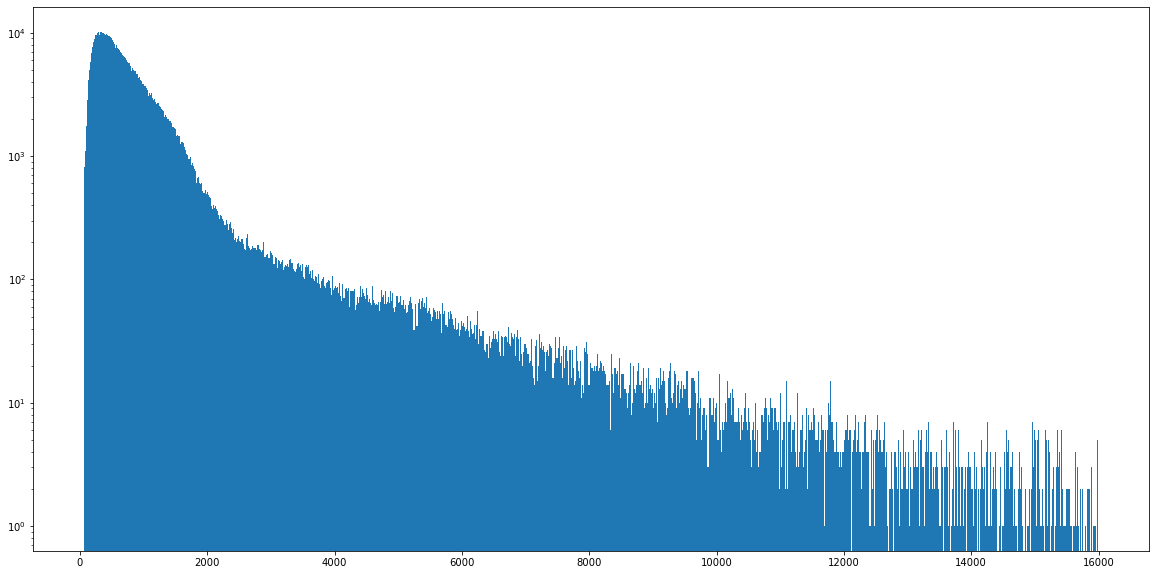

In [187]:
_=plt.hist(bikes[bikes.dur<16000].dur, log=True, bins=1000)

In [188]:
short = bikes[bikes.dur<16000]

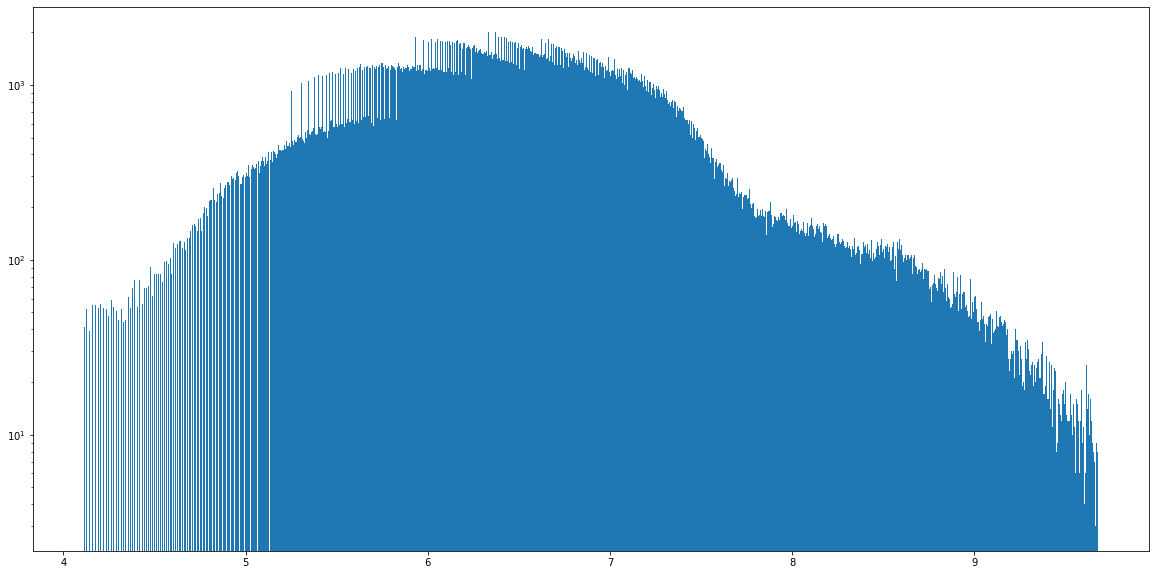

In [189]:
_=plt.hist(np.log1p(short.dur), log=True, bins=1000)

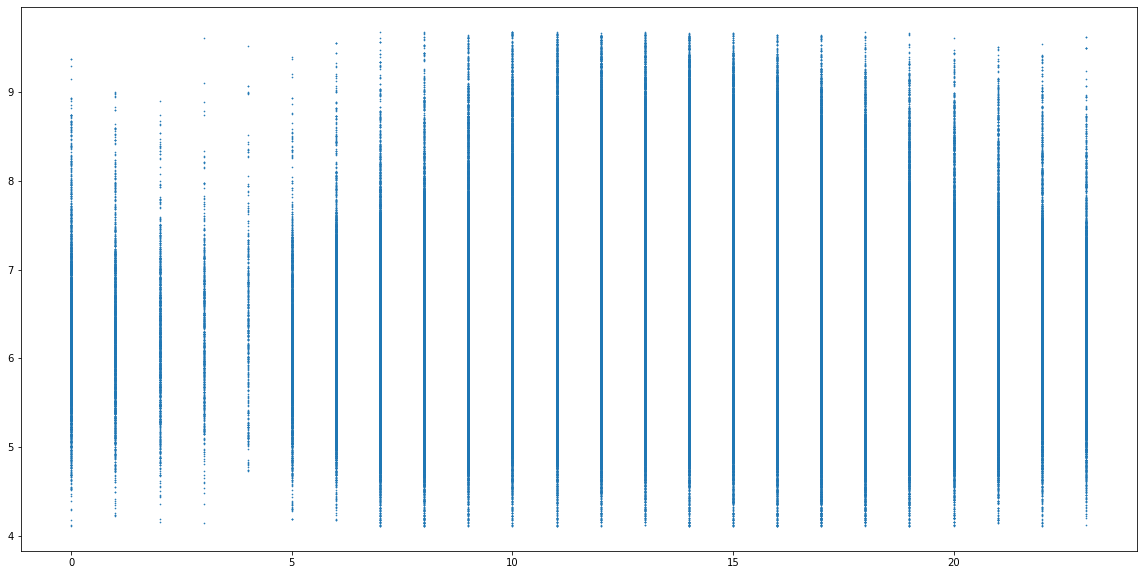

In [190]:
plt.scatter(short.start.dt.hour, np.log1p(short.dur), s=.4)

In [191]:
np.log1p(0), np.log(0), np.log(1+0)

C:\Users\17036\AppData\Local\Temp/ipykernel_10104/3982265232.py:1: RuntimeWarning: divide by zero encountered in log
  np.log1p(0), np.log(0), np.log(1+0)


(0.0, -inf, 0.0)

In [192]:
bikes['log_dur'] = np.round(np.log1p(bikes.dur), 1)

In [193]:
monday = bikes[bikes.start.dt.dayofweek==1]

In [194]:
dur_hour = monday.groupby(['log_dur', monday.start.dt.hour]).count()

In [195]:
dur_hour

Duration (ms)  Start date  End date  Start station number  \
log_dur start                                                              
4.1     7                  1           1         1                     1   
        9                  2           2         2                     2   
        11                 1           1         1                     1   
        14                 2           2         2                     2   
        16                 2           2         2                     2   
...                      ...         ...       ...                   ...   
11.2    21                 2           2         2                     2   
11.3    14                 1           1         1                     1   
        17                 1           1         1                     1   
        19                 1           1         1                     1   
11.4    18                 1           1         1                     1   

               Start station  End station number  End station  Bike number  \
log_dur start                                                                
4.1     7                  1                   1            1            1   
        9                  2                   2            2            2   
        11                 1                   1            1            1   
        14                 2                   2            2            2   
        16                 2                   2            2            2   
...                      ...                 ...          ...          ...   
11.2    21                 2                   2            2            2   
11.3    14                 1                   1            1            1   
        17                 1                   1            1            1   
        19                 1                   1            1            1   
11.4    18                 1                   1            1            1   

               Member Type  start  end  dur  
log_dur start                                
4.1     7                1      1    1    1  
        9                2      2    2    2  
        11               1      1    1    1  
        14               2      2    2    2  
        16               2      2    2    2  
...                    ...    ...  ...  ...  
11.2    21               2      2    2    2  
11.3    14               1      1    1    1  
        17               1      1    1    1  
        19               1      1    1    1  
11.4    18               1      1    1    1  

[1184 rows x 12 columns]

In [196]:
duration_hour = dur_hour.start.unstack().T.fillna(0)
duration_hour

log_dur,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,...,10.5,10.6,10.7,10.8,10.9,11.0,11.1,11.2,11.3,11.4
start,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,1.0,4.0,1.0,7.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,2.0,1.0,2.0,4.0,9.0,11.0,21.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,5.0,4.0,1.0,5.0,12.0,25.0,31.0,46.0,46.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,3.0,2.0,6.0,7.0,11.0,22.0,52.0,68.0,79.0,...,4.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


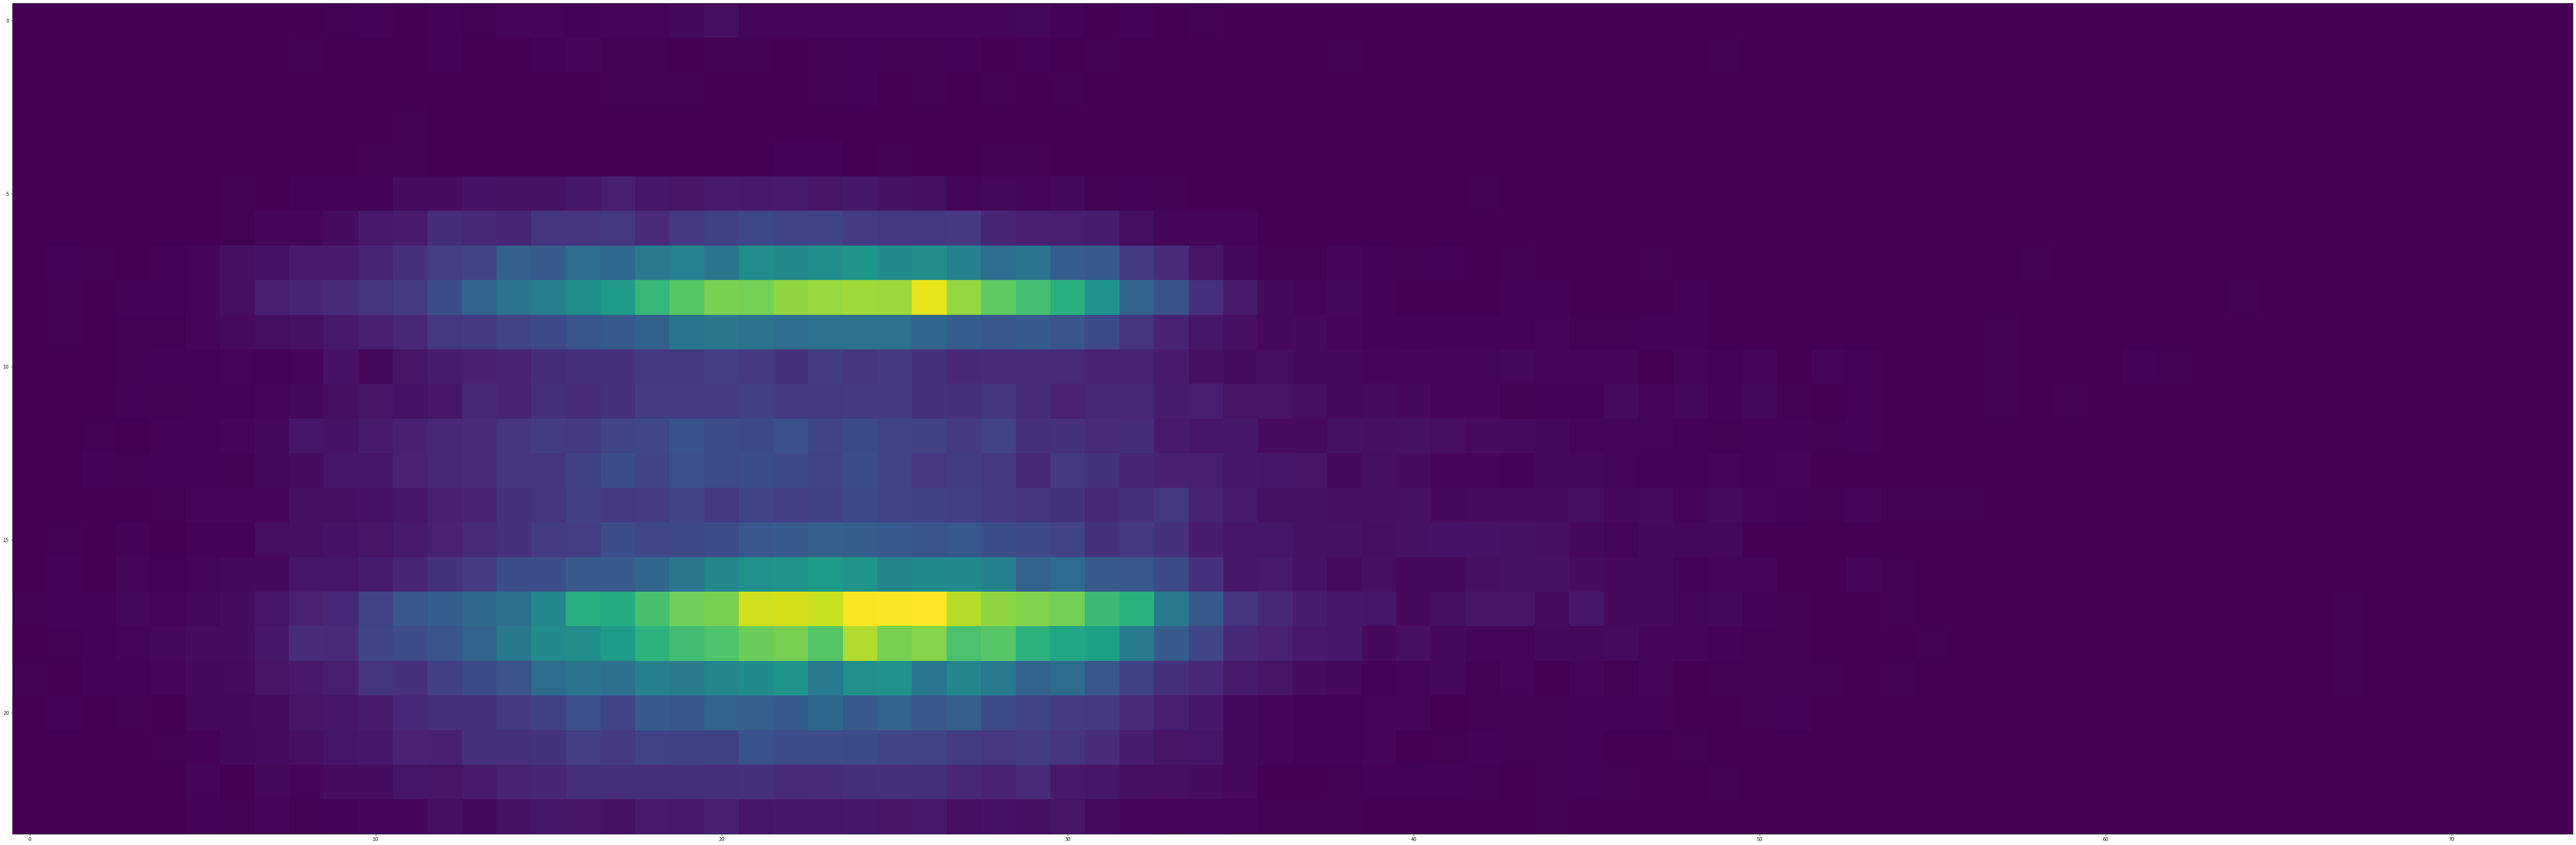

In [197]:
plt.figure(figsize=(100,100))
plt.imshow(duration_hour)

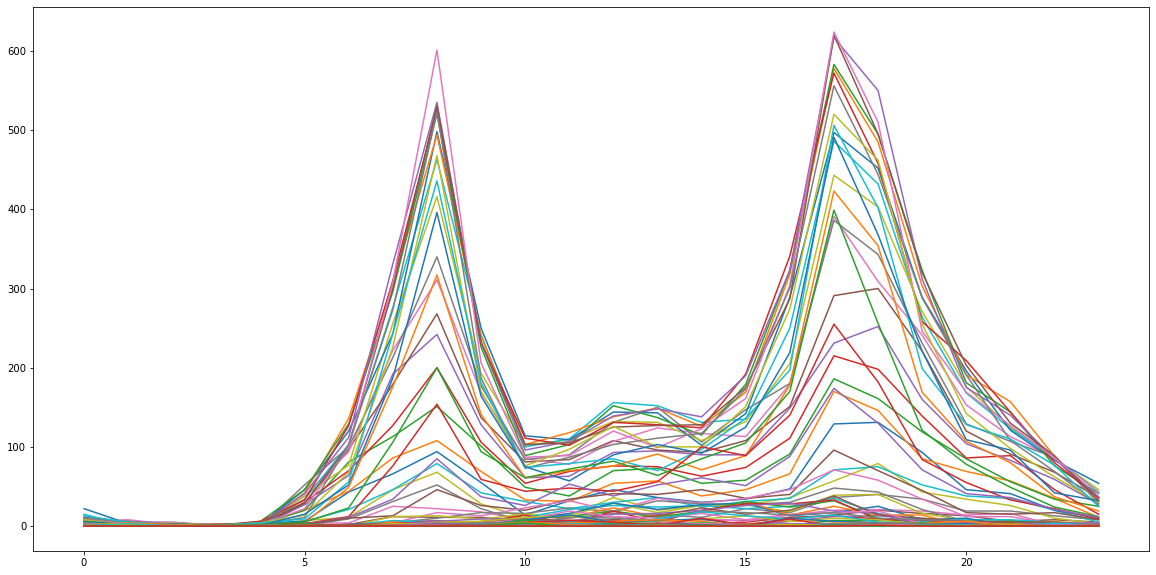

In [198]:
_=plt.plot(duration_hour)

In [199]:
bikes['Member Type'].value_counts()

Registered    467432
Casual         84967
Name: Member Type, dtype: int64

### Create a new column that represents the hour+minute of the day as a fraction (i.e. 1:30pm = 13.5)

In [200]:
np.round(.65, 1)

0.6

In [201]:
37//6, (37//6)/10, 37/60

(6, 0.6, 0.6166666666666667)

In [202]:
bikes['hour_of_day'] = (bikes.start.dt.hour + (bikes.start.dt.minute//6)/10)

In [203]:
bikes['roundhour_of_day'] = (bikes.start.dt.hour ) # keep the hour handy as well

### Aggregate to get a count per hour/minute of the day across all trips

In [204]:
hours

Duration (ms)  Start date  End date  Start station number  \
hour_of_day start                                                              
0.0         0                 21          21        21                    21   
            1                 34          34        34                    34   
            2                 43          43        43                    43   
            3                 47          47        47                    47   
            4                 51          51        51                    51   
...                          ...         ...       ...                   ...   
23.9        2                 48          48        48                    48   
            3                 65          65        65                    65   
            4                105         105       105                   105   
            5                111         111       111                   111   
            6                 23          23        23                    23   

                   Start station  End station number  End station  \
hour_of_day start                                                   
0.0         0                 21                  21           21   
            1                 34                  34           34   
            2                 43                  43           43   
            3                 47                  47           47   
            4                 51                  51           51   
...                          ...                 ...          ...   
23.9        2                 48                  48           48   
            3                 65                  65           65   
            4                105                 105          105   
            5                111                 111          111   
            6                 23                  23           23   

                   Bike number  Member Type  start  end  dur  log_dur  \
hour_of_day start                                                       
0.0         0               21           21     21   21   21       21   
            1               34           34     34   34   34       34   
            2               43           43     43   43   43       43   
            3               47           47     47   47   47       47   
            4               51           51     51   51   51       51   
...                        ...          ...    ...  ...  ...      ...   
23.9        2               48           48     48   48   48       48   
            3               65           65     65   65   65       65   
            4              105          105    105  105  105      105   
            5              111          111    111  111  111      111   
            6               23           23     23   23   23       23   

                   roundhour_of_day  
hour_of_day start                    
0.0         0                    21  
            1                    34  
            2                    43  
            3                    47  
            4                    51  
...                             ...  
23.9        2                    48  
            3                    65  
            4                   105  
            5                   111  
            6                    23  

[1674 rows x 14 columns]

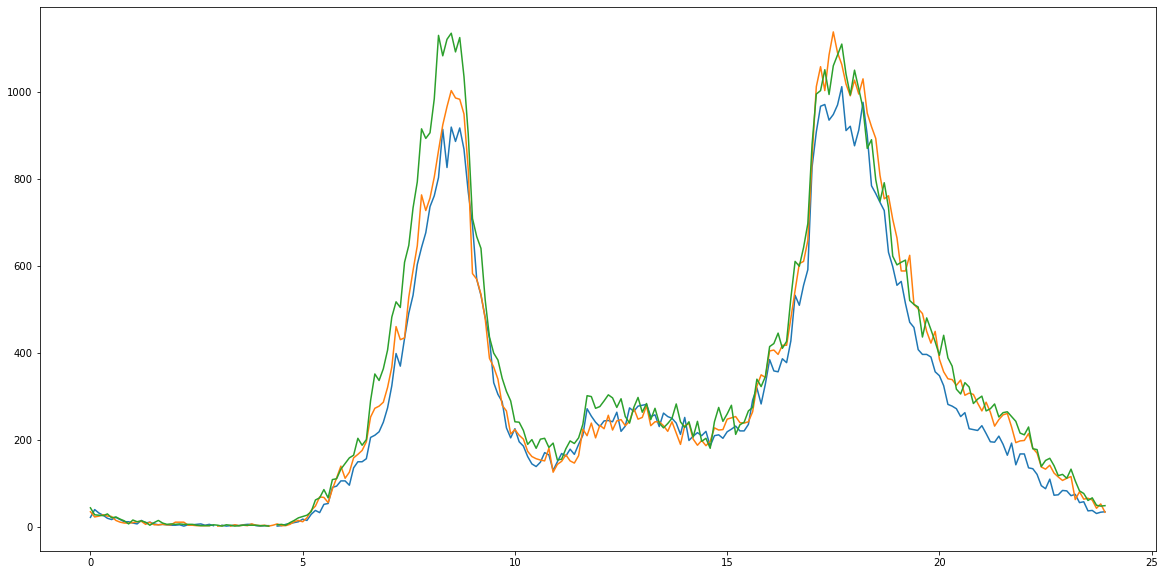

In [205]:
reg_bikes = bikes[bikes['Member Type']=='Registered']
hours = reg_bikes.groupby([reg_bikes.hour_of_day, reg_bikes.start.dt.dayofweek]).agg('count')
#hours['hour'] = hours.index
day_hour_count = hours.dur.unstack()
plt.figure(figsize=(20,10))
plt.plot(day_hour_count.index, day_hour_count[0])
plt.plot(day_hour_count.index, day_hour_count[1])
plt.plot(day_hour_count.index, day_hour_count[2])
# plt.plot(y.index, day_hour_count[3])
# plt.plot(y.index, day_hour_count[4])
# plt.plot(y.index, day_hour_count[5])
# plt.plot(y.index, day_hour_count[6])

In [206]:
day_hour_count

start,0,1,2,3,4,5,6
hour_of_day,,,,,,,
0.0,21.0,34.0,43.0,47.0,51.0,89.0,106.0
0.1,39.0,22.0,27.0,37.0,56.0,87.0,100.0
0.2,31.0,24.0,26.0,42.0,50.0,98.0,77.0
0.3,26.0,27.0,25.0,29.0,52.0,99.0,87.0
0.4,19.0,24.0,29.0,29.0,50.0,98.0,69.0
...,...,...,...,...,...,...,...
23.5,36.0,65.0,60.0,94.0,80.0,93.0,28.0
23.6,37.0,61.0,66.0,100.0,81.0,95.0,28.0
23.7,30.0,42.0,49.0,80.0,101.0,105.0,27.0


<AxesSubplot:xlabel='roundhour_of_day'>

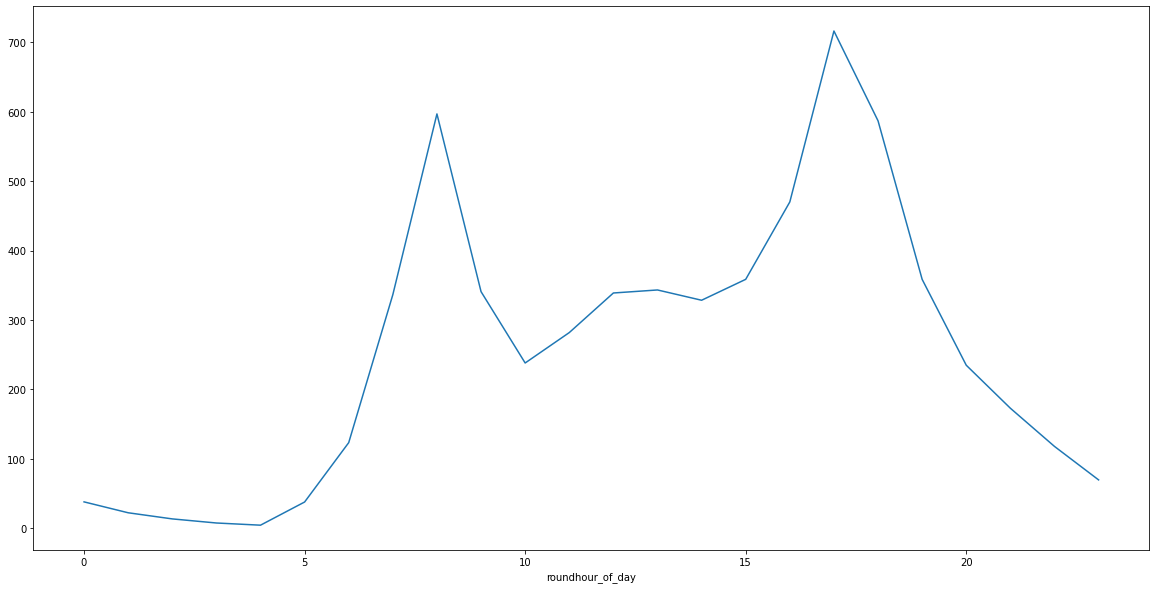

In [207]:
hoursn = bikes.groupby('roundhour_of_day').agg('count')
hoursn['hour'] = hoursn.index
(hoursn.start/90).plot() # 90 days in a quarter

In [208]:
hour_count = bikes.groupby(bikes.start.dt.dayofyear*24 + bikes.start.dt.hour).count()

<AxesSubplot:xlabel='start'>

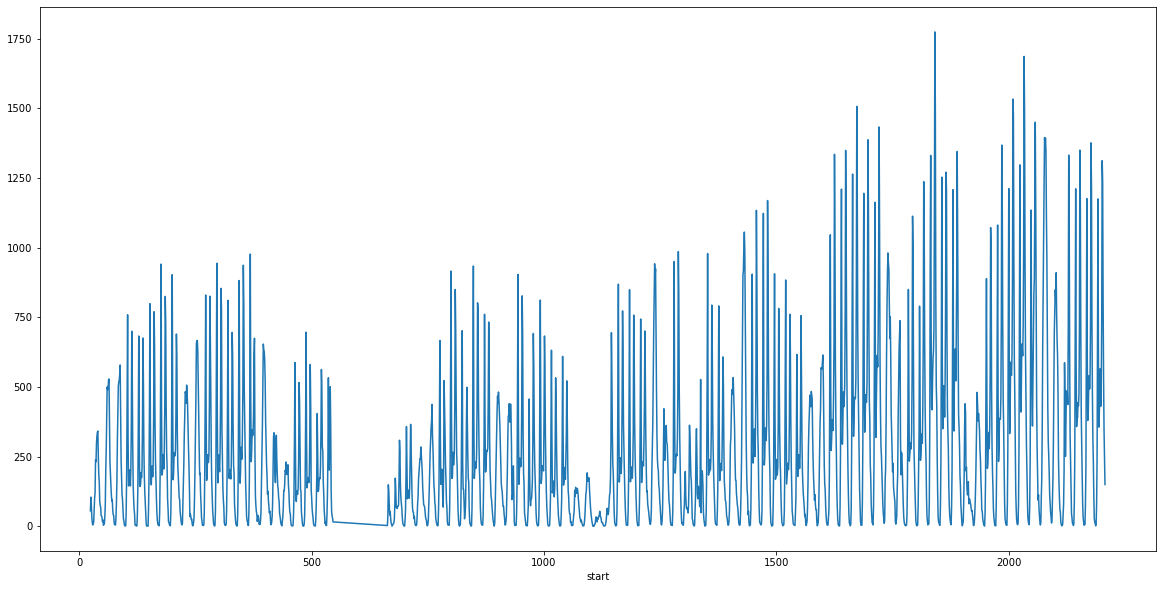

In [209]:
plt.figure(figsize=(20,10))
hour_count.start.plot()

In [210]:
day_count = bikes.groupby(bikes.start.dt.dayofyear).count()

In [211]:
day_hour = bikes.groupby([bikes.start.dt.dayofyear, bikes.start.dt.hour]).count()

In [212]:
day_hour.start.unstack()

start,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
start,,,,,,,,,,,,,,,,,,,,,
1,56.0,105.0,74.0,32.0,13.0,5.0,10.0,14.0,54.0,101.0,...,324.0,338.0,342.0,247.0,185.0,160.0,90.0,75.0,70.0,39.0
2,37.0,31.0,17.0,23.0,4.0,7.0,10.0,34.0,80.0,203.0,...,495.0,525.0,529.0,392.0,232.0,188.0,150.0,114.0,91.0,96.0
3,59.0,42.0,39.0,15.0,6.0,9.0,5.0,33.0,87.0,168.0,...,524.0,546.0,579.0,398.0,237.0,172.0,115.0,96.0,64.0,28.0
4,20.0,6.0,2.0,1.0,3.0,58.0,192.0,468.0,759.0,321.0,...,145.0,206.0,365.0,700.0,547.0,293.0,146.0,96.0,62.0,44.0
5,5.0,5.0,3.0,1.0,2.0,42.0,131.0,363.0,683.0,329.0,...,175.0,208.0,365.0,676.0,519.0,279.0,178.0,122.0,86.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,113.0,82.0,50.0,34.0,12.0,24.0,94.0,166.0,297.0,509.0,...,910.0,761.0,667.0,611.0,475.0,243.0,158.0,101.0,62.0,51.0
88,15.0,7.0,2.0,3.0,8.0,42.0,81.0,197.0,587.0,464.0,...,481.0,437.0,696.0,1332.0,1113.0,620.0,324.0,226.0,148.0,45.0
89,31.0,11.0,9.0,3.0,8.0,79.0,240.0,727.0,1211.0,564.0,...,433.0,473.0,700.0,1350.0,1159.0,700.0,400.0,279.0,178.0,82.0


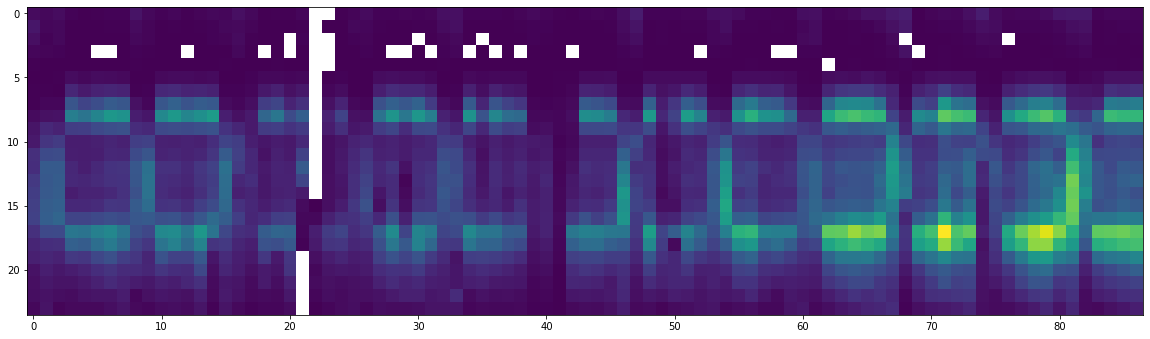

In [213]:
plt.figure(figsize=(20,10))
plt.imshow(day_hour.start.unstack().T)

<AxesSubplot:xlabel='start'>

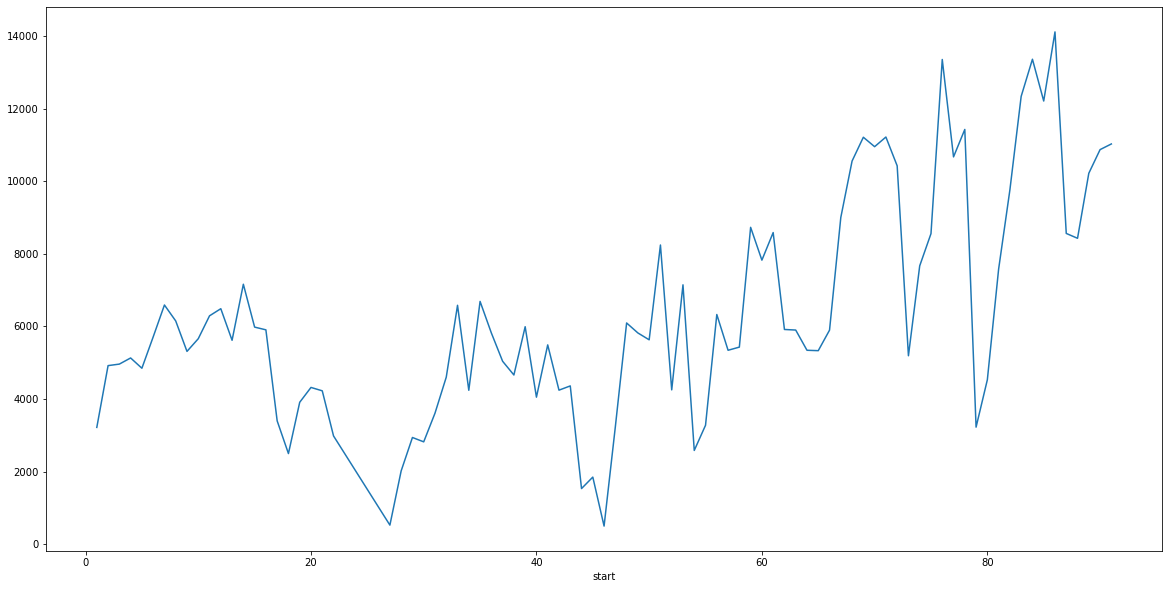

In [214]:
day_count.start.plot()

In [215]:
bikes.start.dt.dayofyear

0         91
1         91
2         91
3         91
4         91
          ..
552394     1
552395     1
552396     1
552397     1
552398     1
Name: start, Length: 552399, dtype: int64

In [216]:
bikes[bikes.start=="2016-01-10"].shape

(1, 15)

# Assignment 4


Explain the results in a **paragraph + charts** of  to describe which model you'd recommend. This means show the data and the model's line on the same chart. The paragraph is a simple justification and comparison of the several models you tried.

# 1. Using the **`day_hour_count`** dataframe create two dataframes `monday` and `saturday` that represent the data for those days. (hint: Monday is day=0)

In [217]:
monday = day_hour_count[[0]].copy()

In [218]:
monday["hour"] = monday.index
monday = monday.rename(columns = {0:'Count'})

In [219]:
monday

start,Count,hour
hour_of_day,,
0.0,21.0,0.0
0.1,39.0,0.1
0.2,31.0,0.2
0.3,26.0,0.3
0.4,19.0,0.4
...,...,...
23.5,36.0,23.5
23.6,37.0,23.6
23.7,30.0,23.7


In [220]:
saturday = day_hour_count[[5]].copy()
saturday['hour'] = saturday.index
saturday = saturday.rename(columns = {5:'Count'})
saturday

start,Count,hour
hour_of_day,,
0.0,89.0,0.0
0.1,87.0,0.1
0.2,98.0,0.2
0.3,99.0,0.3
0.4,98.0,0.4
...,...,...
23.5,93.0,23.5
23.6,95.0,23.6
23.7,105.0,23.7



## 2a. Create 3 models fit to `monday.hour_of_day` with varying polynomial degrees ( choose from `n=1,2,3,5,10,15`). (Repeat for `saturday` below)

## Plot all the results for each polynomial.

In [221]:
# create n = 1, 5, 15 polynomial degrees
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
xm_1 = monday['hour'].values.reshape(-1, 1)
ym = monday.Count.fillna(0)
linear_n1 = linear_model.LinearRegression()
linear_n1.fit(xm_1, ym)
print(linear_n1.coef_, linear_n1.intercept_)

poly = PolynomialFeatures(degree=5)
xm_5 = poly.fit_transform(monday['hour'].values.reshape(-1, 1))
linear_n5 = linear_model.LinearRegression()
linear_n5.fit(xm_5, ym)
print(linear_n5.coef_, linear_n5.intercept_)

poly = PolynomialFeatures(degree=15)
xm_15 = poly.fit_transform(monday['hour'].values.reshape(-1, 1))
linear_n15 = linear_model.LinearRegression()
linear_n15.fit(xm_15, ym)
print(linear_n15.coef_, linear_n15.intercept_)

[13.28550843] 114.23817427385899
[ 0.00000000e+00 -1.04237296e+02  4.95325289e+01 -6.19642324e+00
  3.17932596e-01 -5.80441377e-03] 34.270553868955176
[ 0.00000000e+00  1.31320003e-05  7.67091615e-08  9.21496618e-07
  5.83948036e-06  3.24644736e-05  1.50376451e-04  5.17745833e-04
  9.62517332e-04 -3.95905725e-04  6.39090842e-05 -5.57183042e-06
  2.86733470e-07 -8.74868859e-09  1.46888790e-10 -1.04850022e-12] 19.43303644657135


Text(0.5, 1.0, 'Count of Rides Starting by Hour (Monday)')

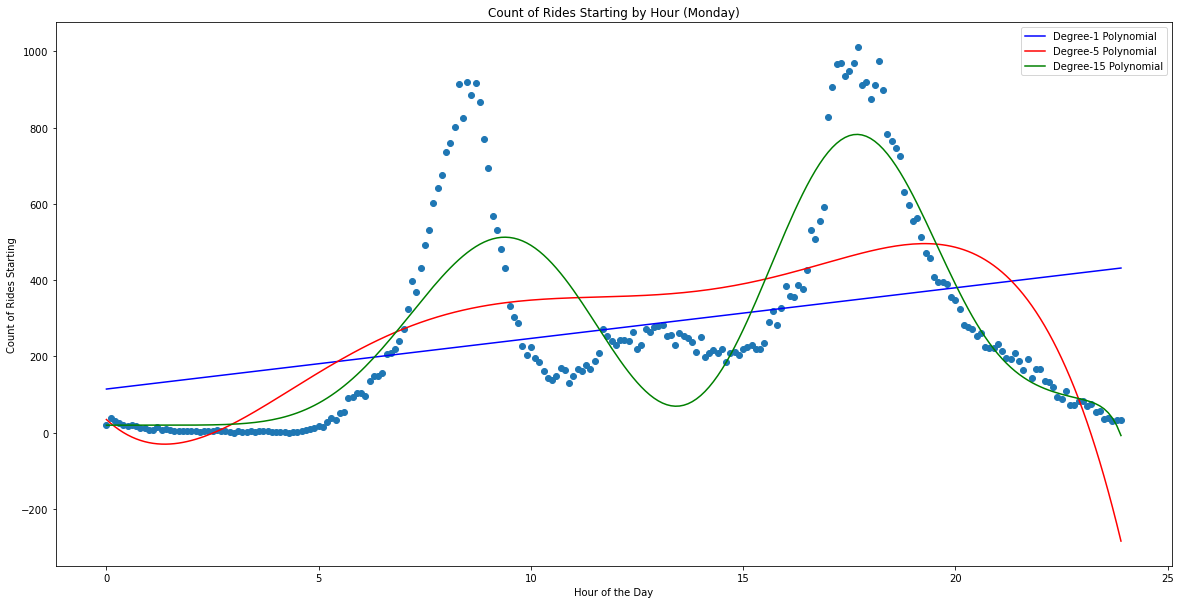

In [222]:
plt.scatter(xm_1,ym)
plt.plot(xm_1, np.dot(xm_1, linear_n1.coef_) + linear_n1.intercept_, c='b')
plt.plot(xm_1, np.dot(xm_5, linear_n5.coef_) + linear_n5.intercept_, c='r')
plt.plot(xm_1, np.dot(xm_15, linear_n15.coef_) + linear_n15.intercept_, c='g')
plt.legend(['Degree-1 Polynomial', 'Degree-5 Polynomial', 'Degree-15 Polynomial'])
plt.xlabel('Hour of the Day')
plt.ylabel('Count of Rides Starting')
plt.title(r'Count of Rides Starting by Hour (Monday)')

## 2b. Repeat `2a` for `saturday.hour_of_day`

In [223]:
xs_1 = saturday['hour'].values.reshape(-1, 1)
ys = saturday.Count.fillna(0)
linear_n1 = linear_model.LinearRegression()
linear_n1.fit(xs_1, ys)
print(linear_n1.coef_, linear_n1.intercept_)

poly = PolynomialFeatures(degree=3)
xs_3 = poly.fit_transform(saturday['hour'].values.reshape(-1, 1))
linear_n3 = linear_model.LinearRegression()
linear_n3.fit(xs_3, ys)
print(linear_n3.coef_, linear_n3.intercept_)

poly = PolynomialFeatures(degree=5)
xs_5 = poly.fit_transform(saturday['hour'].values.reshape(-1, 1))
linear_n5 = linear_model.LinearRegression()
linear_n5.fit(xs_5, ys)
print(linear_n5.coef_, linear_n5.intercept_)

[10.13721158] 91.97282157676354
[  0.         -21.28150575   7.05352239  -0.2664324 ] 34.735790029315524
[ 0.00000000e+00 -7.69357325e+01  8.78980568e+00  7.64304295e-01
 -9.33173938e-02  2.15983799e-03] 133.062987707888


Text(0.5, 1.0, 'Count of Rides Starting by Hour (Saturday)')

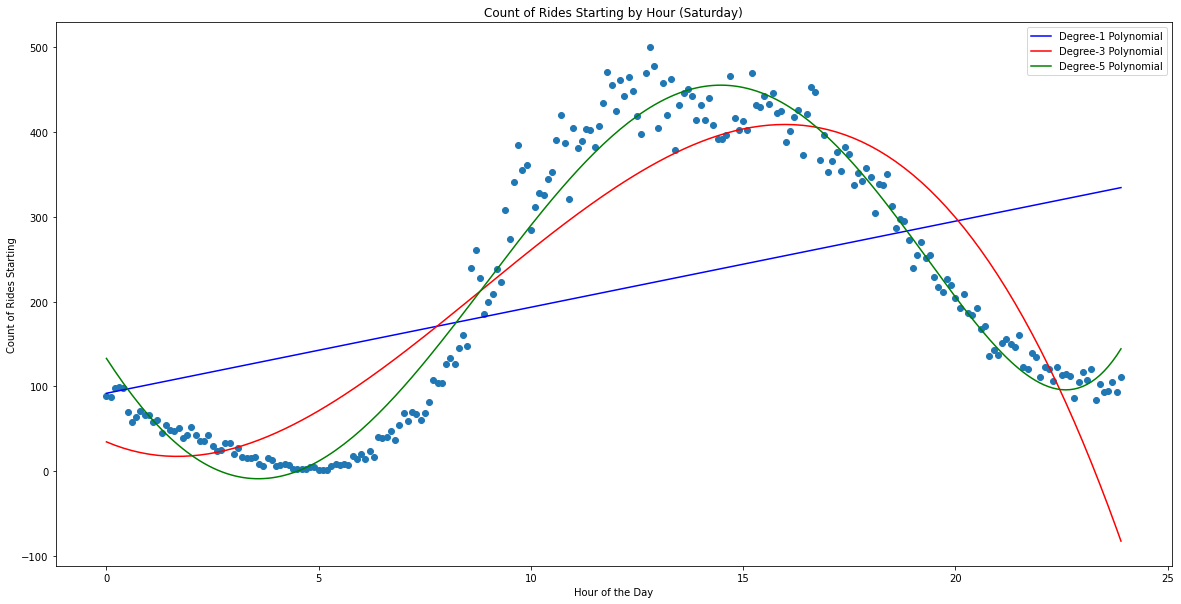

In [224]:
plt.scatter(xs_1,ys)
plt.plot(xs_1, np.dot(xs_1, linear_n1.coef_) + linear_n1.intercept_, c='b')
plt.plot(xs_1, np.dot(xs_3, linear_n3.coef_) + linear_n3.intercept_, c='r')
plt.plot(xs_1, np.dot(xs_5, linear_n5.coef_) + linear_n5.intercept_, c='g')
plt.legend(['Degree-1 Polynomial', 'Degree-3 Polynomial', 'Degree-5 Polynomial'])
plt.xlabel('Hour of the Day')
plt.ylabel('Count of Rides Starting')
plt.title(r'Count of Rides Starting by Hour (Saturday)')

## 3. create 3 new models fit to `hour_of_day` with different Ridge Regression $\alpha$ (alpha) Ridge Coefficient values using the `monday` and `saturday` datasets.


In [225]:
#Monday
# The Degree-15 Polynomial Linear model seemed to have the best fit to the data
ridge_n50 = linear_model.Ridge(alpha=50)
ridge_n50.fit(xm_15, ym)
print(ridge_n50.coef_, ridge_n50.intercept_)

ridge_n75 = linear_model.Ridge(alpha=75)
ridge_n75.fit(xm_15, ym)
print(ridge_n75.coef_, ridge_n75.intercept_)

ridge_n100 = linear_model.Ridge(alpha=100)
ridge_n100.fit(xm_15, ym)
print(ridge_n100.coef_, ridge_n100.intercept_)

[ 0.00000000e+00 -1.49849369e-02 -1.05191255e+01  3.42500475e+01
  2.07539063e+01 -4.17601600e+01  2.06809625e+01 -5.29986400e+00
  8.35775819e-01 -8.72808974e-02  6.23603224e-03 -3.07098445e-04
  1.02659953e-05 -2.22656927e-07  2.82751150e-09 -1.59612925e-11] 50.31060791015625
[ 0.00000000e+00 -1.19651218e-02 -6.72730937e+00  2.80215190e+01
  1.51154820e+01 -3.34571742e+01  1.69056544e+01 -4.36997075e+00
  6.91450405e-01 -7.22192327e-02  5.14904327e-03 -2.52591025e-04
  8.39871608e-06 -1.80934145e-07  2.27915983e-09 -1.27445026e-11] 11.362903594970703
[ 0.00000000e+00 -1.12753174e-02 -4.85351481e+00  2.34830029e+01
  1.17112421e+01 -2.81242888e+01  1.44590956e+01 -3.76485233e+00
  5.97252982e-01 -6.23653502e-02  4.43648512e-03 -2.16800216e-04
  7.17089989e-06 -1.53466889e-07  1.91779432e-09 -1.06227367e-11] -5.649417877197266


Text(0.5, 1.0, 'Count of Rides Starting by Hour (Monday)')

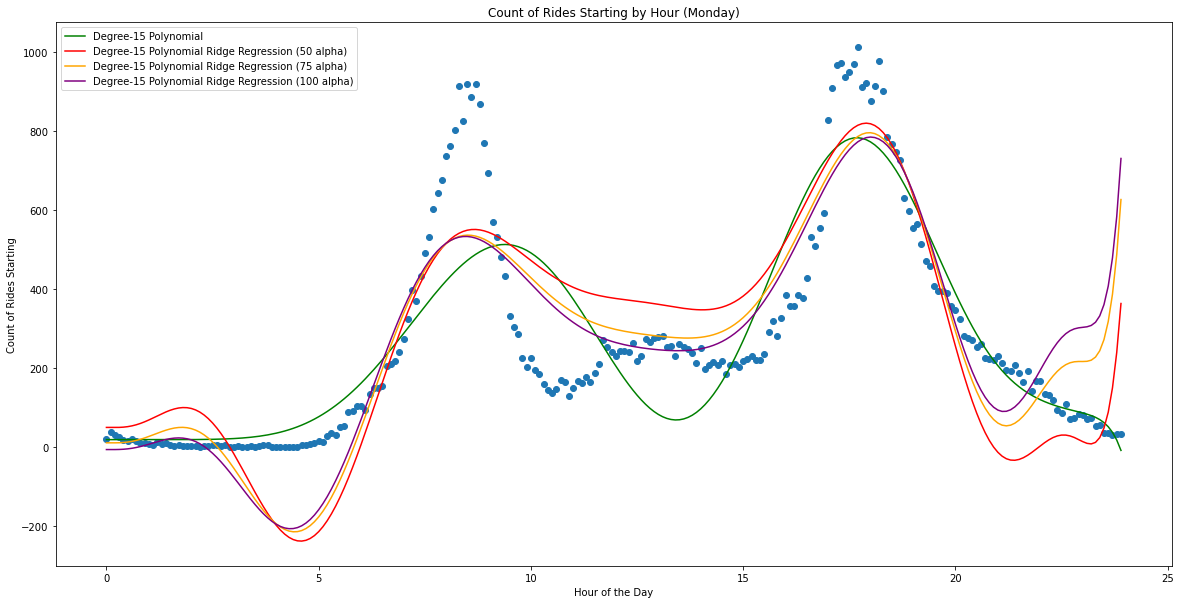

In [229]:
plt.scatter(xm_1,ym)
plt.plot(xm_1, np.dot(xm_15, linear_n15.coef_) + linear_n15.intercept_, c='g')
plt.plot(xm_1, np.dot(xm_15, ridge_n50.coef_) + ridge_n50.intercept_, c='r')
plt.plot(xm_1, np.dot(xm_15, ridge_n75.coef_) + ridge_n75.intercept_, c='orange')
plt.plot(xm_1, np.dot(xm_15, ridge_n100.coef_) + ridge_n100.intercept_, c='purple')
plt.legend(['Degree-15 Polynomial', 
            r'Degree-15 Polynomial Ridge Regression (50 alpha)',
           r'Degree-15 Polynomial Ridge Regression (75 alpha)',
           r'Degree-15 Polynomial Ridge Regression (100 alpha)'])
plt.xlabel('Hour of the Day')
plt.ylabel('Count of Rides Starting')
plt.title(r'Count of Rides Starting by Hour (Monday)')

In [227]:
#Saturday
# The Degree-5 Polynomial Linear model seemed to have the best fit to the data
ridge_np5 = linear_model.Ridge(alpha=.5)
ridge_np5.fit(xs_5, y)
print(ridge_np5.coef_, ridge_np5.intercept_)

ridge_n5 = linear_model.Ridge(alpha=5)
ridge_n5.fit(xs_5, y)
print(ridge_n5.coef_, ridge_n5.intercept_)

ridge_n10 = linear_model.Ridge(alpha=10)
ridge_n10.fit(xs_5, y)
print(ridge_n10.coef_, ridge_n10.intercept_)

[ 0.00000000e+00 -7.31349548e+01  7.82993105e+00  8.60908492e-01
 -9.75305400e-02  2.22630906e-03] 129.24661958278813
[ 0.00000000e+00 -5.09037769e+01  2.22278512e+00  1.42474048e+00
 -1.22105553e-01  2.61385230e-03] 106.87524078275493
[ 0.00000000e+00 -3.83712739e+01 -9.26844870e-01  1.74069811e+00
 -1.35853254e-01  2.83037257e-03] 94.18740109835272


Text(0.5, 1.0, 'Count of Rides Starting by Hour (Saturday)')

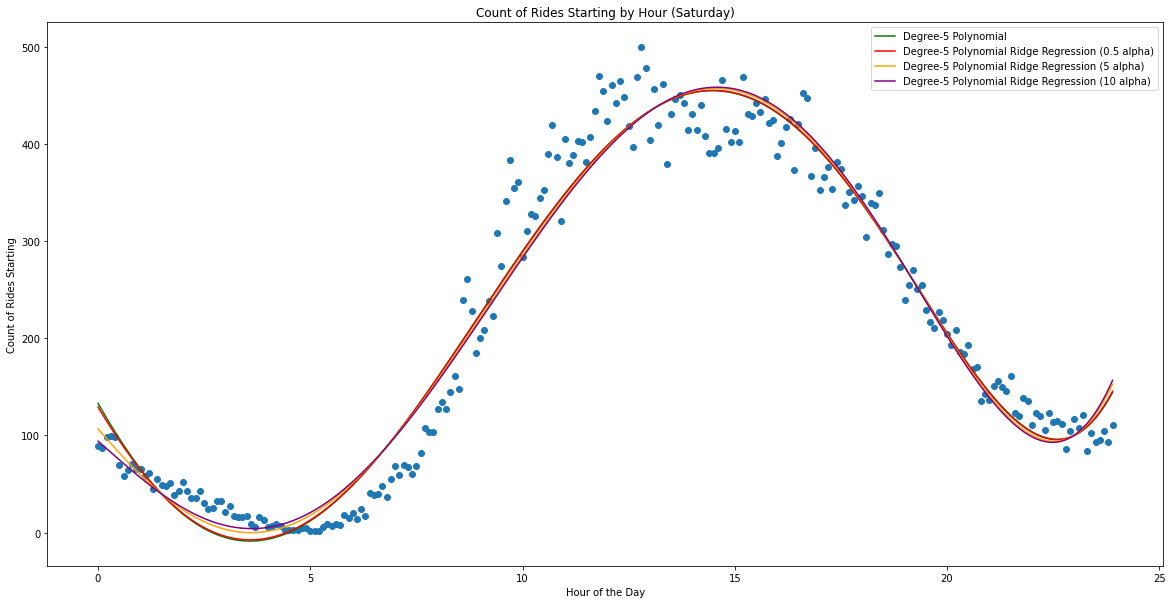

In [228]:
plt.scatter(xs_1,y)
plt.plot(xs_1, np.dot(xs_5, linear_n5.coef_) + linear_n5.intercept_, c='g')
plt.plot(xs_1, np.dot(xs_5, ridge_np5.coef_) + ridge_np5.intercept_, c='r')
plt.plot(xs_1, np.dot(xs_5, ridge_n5.coef_) + ridge_n5.intercept_, c='orange')
plt.plot(xs_1, np.dot(xs_5, ridge_n10.coef_) + ridge_n10.intercept_, c='purple')
plt.legend(['Degree-5 Polynomial', 
            r'Degree-5 Polynomial Ridge Regression (0.5 alpha)',
           r'Degree-5 Polynomial Ridge Regression (5 alpha)',
           r'Degree-5 Polynomial Ridge Regression (10 alpha)'])
plt.xlabel('Hour of the Day')
plt.ylabel('Count of Rides Starting')
plt.title(r'Count of Rides Starting by Hour (Saturday)')